# Kwantyle

Dla każdej dystrybuanty $F$, a więc też dla każdej zmiennej losowej, określa się tak zwany kwantyl rzędu $p$, gdzie $0 < p < 1$. Jest to liczba:

$$
q_p = \min \{ x : F(x) \ge p \}.
$$

W przypadku gdy dystrybuanta jest funkcją odwracalną, określenie kwantyla znacznie się upraszcza:

$$
q_p = F^{-1}(p).
$$


Wówczas kwantyl ma prostą interpretację w języku zmiennych losowych. Mianowicie:

$$
P(X < q_p) = P(X \le q_p) = F(q_p) = p,
$$

$$
P(X > q_p) = 1 - P(X \le q_p) = 1 - F(q_p) = 1- p.
$$

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Będziemy liczyć kwantyl rzędu $p=0.75$ (kwantyl rzędu 3/4 = trzeci kwartyl)

In [11]:
p=0.75

Zdefiniujmy zmienną losową o rozkładzie Normalnym

In [12]:
(mu, sigma)=(0,1)
nd=stats.norm(mu, sigma)

# Percentile Point Function (PPF): the inverse of the CDF: 
Jak widzimy czasami w obliczeniach przydaje się funkcja odwrotna do dystrybuanty $CDF^{-1}(x)$, którą nazywa się Percentile Point Function (PPF): 

$$
PPF(x)=CDF^{-1}(x)
$$

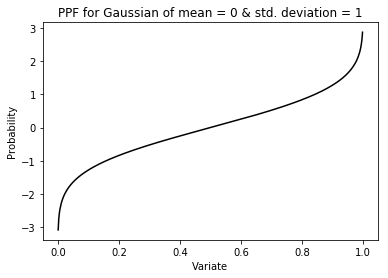

In [18]:
# 50 numbers between -3σ and 3σ
x = np.linspace(-1, 1, 1000)
# PPF at these values
y = stats.norm.ppf(x, loc=mu, scale=sigma)
# print(x)
# print(y)
plt.plot(x,y, color="black")
plt.xlabel("Variate")
plt.ylabel("Probability")
plt.title("PPF for Gaussian of mean = {0} & std. deviation = {1}".format(mu, sigma))
plt.show()

In [19]:
p=0.75
stats.norm.ppf(p)

0.6744897501960817

$$
P(X < q_p) = P(X \le q_p) = F(q_p) = p,
$$

In [21]:
# ppf = cdf^(-1)
# sprawdzenie, że stats.norm.cdf(stats.norm.ppf(p)) = p
print(stats.norm.cdf(stats.norm.ppf(p)))
print(p)

0.75
0.75



$$
P(X > q_p) = 1 - P(X \le q_p) = 1 - F(q_p) = 1- p.
$$

In [23]:
# sf = 1 - cdf
# sprawdzenie, że stats.norm.sf(stats.norm.ppf(p)) = 1-stats.norm.cdf(stats.norm.ppf(p)) = 1-p
print(stats.norm.sf(stats.norm.ppf(p)))
print(1-stats.norm.cdf(stats.norm.ppf(p)))
print(1-p)

0.25
0.25
0.25


# Zadanie 1
Narysuj na oddzielnych wykresach: 
<ul>
<li> gęstość rozkładu normalnego </li>
<li> dystrybuantę rozkładu normalnego </li>
<li> funkcję odwrotną do dystrybuanty </li>
</ul>

i zaznacz na nich odpowiednie wartości tak by móc odtworzyć poniższy rysunek.

In [41]:
mi=0
sigma=1

gauss = stats.norm(mi, sigma)
gauss

x0 = 0.6745
pole pod wykresem = całka = 0.75


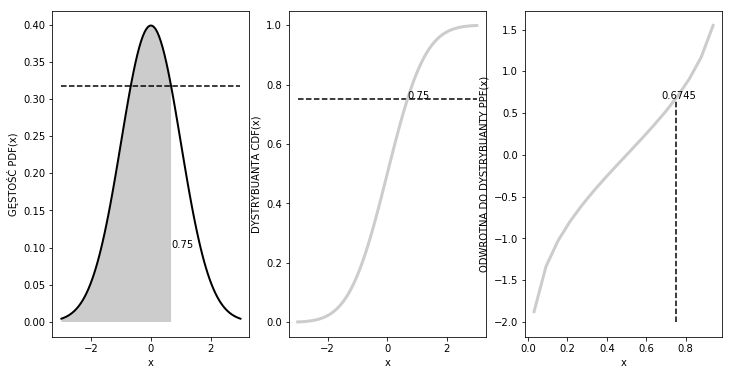

In [71]:
x = np.linspace(-3, 3, 100)
y_pdf = gauss.pdf(x)
p=0.75
x0=stats.norm.ppf(p)
(inte,err)=integrate.quad(lambda x: gauss.pdf(x), -np.inf, x0)
print('x0 =', np.round(x0,4)) #0.6745
print('pole pod wykresem = całka =',np.round(inte,4)) #0.75

# przedział (-3, x0)
x1=np.linspace(-3,x0)
y1_pdf=gauss.pdf(x1)

fig, ax = plt.subplots(1,3, figsize=(12,6))

# funkcja gęstości
ax[0].plot(x, y_pdf, lw=2, c='k')
ax[0].set_xlabel('x')
ax[0].set_ylabel('GĘSTOŚĆ PDF(x)')
ax[0].fill_between(x1, y1_pdf, facecolor='#CCCCCC')
ax[0].text(x0, 0.1, np.round(inte,4))
ax[0].hlines(gauss.pdf(x0), -3, 3, linestyles='--')


# dystrybuanta
y2_cdf=gauss.cdf(x)

ax[1].plot(x, y2_cdf, lw=3, c='#CCCCCC')
ax[1].set_xlabel('x')
ax[1].set_ylabel('DYSTRYBUANTA CDF(x)')
ax[1].text(x0, gauss.cdf(x0), np.round(gauss.cdf(x0),4))
ax[1].hlines(p, -3, 3, linestyles='--')

# funkcja odwrotna do dystrybuanty
y3_ppf = gauss.ppf(x)

ax[2].plot(x, y3_ppf, lw=3, c='#CCCCCC')
ax[2].set_xlabel('x')
ax[2].set_ylabel('ODWROTNA DO DYSTRYBUANTY PPF(x)')
ax[2].text(x0, gauss.ppf(p), np.round(gauss.ppf(p),4))
ax[2].vlines(p, -2, gauss.ppf(p), linestyles='--')

plt.show()

0.75


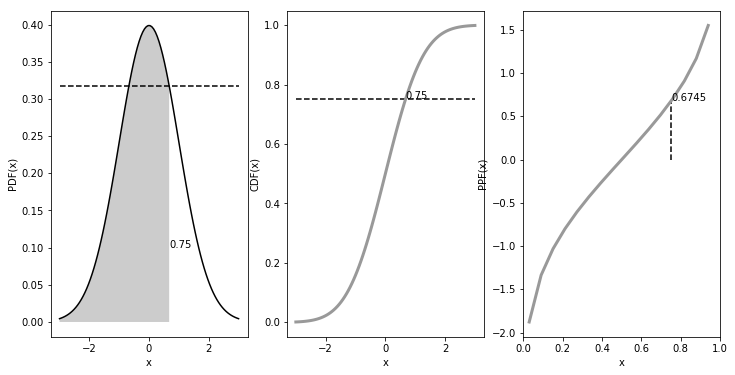